In [1]:
import numpy as np
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import extract_vector as ev
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
arousal_dataset = pickle.load(open("../RawDataset/FusedAllData.pkl","rb"))
arousal_label = ev.getLabelData(type="arousal")

valence_dataset = pickle.load(open("../RawDataset/FusedAllData.pkl","rb"))
valence_label = ev.getLabelData(type="valence")

In [3]:
arousal_dataset = arousal_dataset.astype(float)
arousal_label = arousal_label.astype(float)

valence_dataset = valence_dataset.astype(float)
valence_label = valence_label.astype(float)

In [4]:
def getLabel(label):
    new_label=[]
    for i in range(len(label)):
        if(label[i][0]>=4.5):
            new_label.append(1)
        else:
            new_label.append(0)
    return new_label

In [5]:
# clean data
def clean_data(dataset, target):
    del_rows = []
    for i in range(len(dataset)):
        if(np.isnan(dataset[i]).sum() > 0):
            del_rows.append(i)
            
    dataset = np.delete(dataset, del_rows, axis=0)
    target = np.delete(target, del_rows, axis=0)
    
    return dataset,target

In [6]:
arousal_dataset,arousal_label = clean_data(arousal_dataset,arousal_label)
valence_dataset,valence_label = clean_data(valence_dataset,valence_label)

In [7]:
arousal_label = getLabel(arousal_label)
valence_label = getLabel(valence_label)

In [8]:
print(arousal_dataset.shape)

(755, 126)


In [9]:
sm1 = SMOTE()
arousal_dataset,arousal_label = sm1.fit_resample(arousal_dataset,arousal_label)

sm2 = SMOTE()
valence_dataset,valence_label = sm2.fit_resample(valence_dataset,valence_label)

In [10]:
sc = StandardScaler()

arousal_dataset = sc.fit_transform(arousal_dataset)
valence_dataset = sc.fit_transform(valence_dataset)

In [11]:
pca = PCA(n_components=35)

arousal_dataset = pca.fit_transform(arousal_dataset)
valence_dataset = pca.fit_transform(valence_dataset)

In [12]:
ar_model = SVC(kernel="rbf",C = 10)
val_model = SVC(kernel="rbf",C = 10)

In [13]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(arousal_dataset,arousal_label,test_size=0.3,random_state=42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(valence_dataset,valence_label,test_size=0.3,random_state=42)

## Arousal

In [14]:
ar_model.fit(x_a_train,y_a_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
pred_a = ar_model.predict(x_a_test)
print(classification_report(y_a_test,pred_a))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       150
           1       0.83      0.69      0.76       161

    accuracy                           0.77       311
   macro avg       0.78      0.77      0.77       311
weighted avg       0.78      0.77      0.77       311



In [16]:
confusion_matrix(y_a_test,pred_a)

array([[128,  22],
       [ 50, 111]])

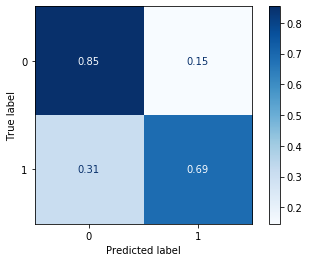

In [17]:
plot_confusion_matrix(ar_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

## Valence

In [18]:
val_model.fit(x_v_train,y_v_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
pred_v = val_model.predict(x_v_test)
print(classification_report(y_v_test,pred_v))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       158
           1       0.59      0.67      0.63       114

    accuracy                           0.67       272
   macro avg       0.66      0.67      0.67       272
weighted avg       0.68      0.67      0.67       272



In [20]:
confusion_matrix(y_v_test,pred_v)

array([[106,  52],
       [ 38,  76]])

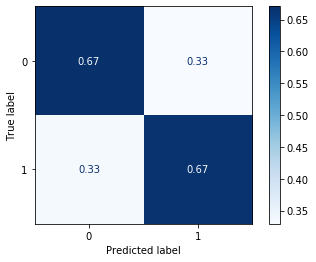

In [21]:
plot_confusion_matrix(val_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)